In [1]:
!pip install wordcloud

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud

In [5]:
#xls = pd.ExcelFile('coin_Bitcoin.xlsx')
data = pd.read_csv("UsedCarPrediction.csv")
data['CarAge']= date.today().year-data['Year']
data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model,CarAge
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,8
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,9
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,9
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,8
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,6


<AxesSubplot:>

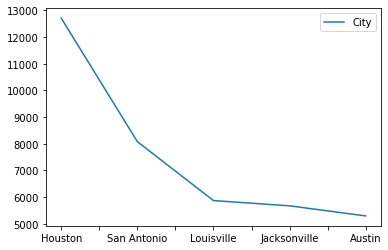

In [6]:
totalCarsInStates=data['City'].value_counts().head().to_frame()
totalCarsInStates.plot()

<AxesSubplot:>

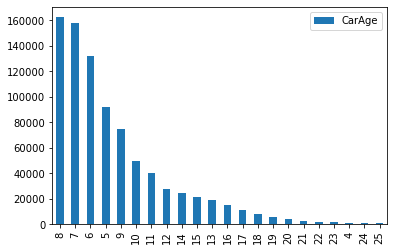

In [7]:
totalCars=data['CarAge'].value_counts().to_frame()
totalCars.plot(kind='bar')

(0.0, 43587.84107125356)

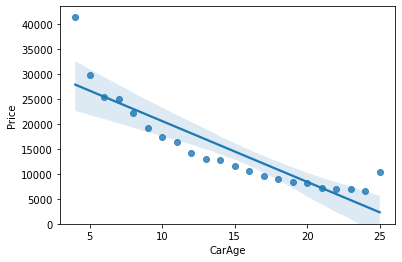

In [8]:
data2=data[['CarAge','Price']]
dataGroup1=data2.groupby(['CarAge'], as_index=False).mean()
sns.regplot(x="CarAge",y="Price",data=dataGroup1)
plt.ylim(0,)

<AxesSubplot:xlabel='[Year]', ylabel='[Price]'>

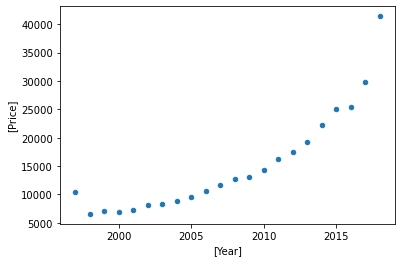

In [9]:
data3=data.groupby(['Year'], as_index=False).mean()
data3.plot(['Year'],['Price'],kind='scatter')

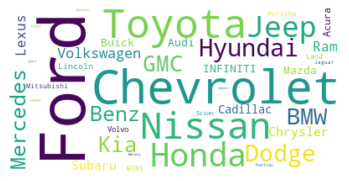

In [10]:
text = " ".join(data.Make)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
data.describe()

,Price,Year,Mileage,CarAge
count,852122.000000,852122.000000,8.521220e+05,852122.000000
mean,21464.100210,2013.289145,5.250779e+04,8.710855
std,13596.202241,3.414987,4.198896e+04,3.414987
min,1500.000000,1997.000000,5.000000e+00,4.000000
25%,13000.000000,2012.000000,2.383600e+04,6.000000
50%,18500.000000,2014.000000,4.025600e+04,8.000000
75%,26995.000000,2016.000000,7.218600e+04,10.000000
max,499500.000000,2018.000000,2.856196e+06,25.000000


In [12]:
pearson_coef, p_value= stats.pearsonr(data['CarAge'],data['Price'])
pearson_coef

-0.40125015138755266

In [13]:
crossTab=pd.crosstab(data['State'],data['Make'], rownames=['State'], colnames=['Make'])

In [14]:
stats.chi2_contingency(crossTab,correction=True)

(82335.39636906059,
 0.0,
 3306,
 array([[3.70803711e-02, 2.15632116e+01, 8.58703331e-02, ...,
         4.53727131e+01, 9.96486184e+00, 1.39148972e+00],
        [2.96397699e-01, 1.72363062e+02, 6.86394671e-01, ...,
         3.62681584e+02, 7.96529816e+01, 1.11227136e+01],
        [1.55010667e-01, 9.01427824e+01, 3.58972072e-01, ...,
         1.89675948e+02, 4.16570773e+01, 5.81697926e+00],
        ...,
        [3.34682123e-02, 1.94626462e+01, 7.75053337e-02, ...,
         4.09527615e+01, 8.99414168e+00, 1.25593870e+00],
        [1.36013388e-02, 7.90953643e+00, 3.14978372e-02, ...,
         1.66430276e+01, 3.65518083e+00, 5.10408134e-01],
        [2.22972767e-03, 1.29664532e+00, 5.16357986e-03, ...,
         2.72836519e+00, 5.99209972e-01, 8.36734646e-02]]))

In [15]:
# Since pValue<0.005, we reeject the null hypothesis that 2 variables are indepenent and State and Make have some association.

In [16]:
x=data[['Year','Mileage']]
y=data['Price']

model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.1925044953527867
intercept: -1500990.0351707959
slope: [ 7.58529166e+02 -8.92134485e-02]


In [17]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[23500.55530623 24180.05771588 21571.01041527 ... 25622.83767327
 28695.20683918 28740.08120376]
